# O lançamento de um bastão

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 01 de Setembro de 2021

O objetivo deste `Notebook` é conseguir explicar o lançamento de um bastão utilizando de alguns princípios da mecânica clássica e, a partir disso, gerar alguns resultados graficamente interessantes.

O `Notebook` estará dividido em três seções principais:
1. Definindo as condições iniciais do movimento do bastão;
2. Resolvendo e plotando o gráfico do movimento do bastão em função do tempo;
3. Outros dados interessantes.

A primeira seção é destinada a fundamentar o contexto físico do movimento do bastão, enquanto a segunda seção é destinada a encontrar uma solução para este movimento em função do tempo.

Já na terceira seção, encontraremos alguns outros resultados interessantes como uma função do tempo, como: a energia cinética translacional, a energia cinética rotacional e a energia potencial do bastão.

### Importando as bibliotecas necessárias


Neste `Notebook`, utilizaremos as bibliotecas Numpy, Matplotlib e Scipy.

In [1]:
from scipy.constants import g
from numpy import sin, cos, linspace, pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 1. Definindo as condições iniciais do movimento do bastão

Primeiramente, devemos definir as condições iniciais de lançamento do bastão. Dito isto, podemos imaginar o lançamento de um bastão, ignorando a resistência do ar, como um movimento de translação e de rotação que agem conjuntamente de forma independente.

Assim, o centro de massa do bastão será arremessado com uma velocidade $v_0$ e um certo ângulo $\theta$ do plano horizontal e, além disso, aplicaremos certa velocidade angular $\omega$ constante em torno do centro de massa do bastão.

Ainda, iremos supor que hajam duas massas $m$ acopladas a cada extremidadade do bastão e que o bastão tem um certo comprimento $L$.

Desta forma, as condições iniciais do lançamento do bastão podem ser resumidas por meio da imagem a seguir, onde o centro de massa é marcado com um "X".

![Condições iniciais do lançamento do bastão](../Imagens/condicoes_bastao.png)

## 2. Resolvendo e plotando o gráfico do movimento do bastão em função do tempo

### 2.1 Resolvendo as equações de movimento

Como o movimento do centro de massa do bastão pode ser descrito como, basicamente, um lançamento oblíquo, podemos escrever as coordenadas do centro de massa $x_{cm}$ e $y_{cm}$ como:

$$
x_{cm} = v_{0x}t,
$$

$$
y_{cm} = v_{0y}t - \frac{1}{2}gt^2,
$$

onde $t$ é o tempo decorrido desde o início do lançamento, $v_{0x}$ e $v_{0y}$ são as velocidades iniciais do centro de massa em $x$ e em $y$, respectivamente, e $g$ é a aceleração gravitacional terrestre.

Além da descrição do movimento do centro de massa em relação a um observador parado no chão, também queremos descrever o movimento de cada uma das massas em relação a este. Para isso, primeiramente descreveremos as coordenadas de cada uma das massas em relação ao centro de massa.

Chamemos, antes de tudo, as duas extremidades de $a$ e $b$ (conforme a imagem anterior). Ainda, admitiremos um certo ângulo $\phi$ que mede a angulação do bastão em relação ao eixo $x$.

Utilizando as coordenadas polares, podemos descrever a posição de cada extremidade em relação ao centro de massa como:

$$
(r_a, \phi_a) = (\frac{L}{2},\phi(t)),
$$

$$
(r_b, \phi_b) = (\frac{L}{2},\phi(t) + \pi).
$$

Ainda, podemos escrever o ângulo $\phi$ como uma função do tempo utlizando do fato de que a velocidade angular $\omega$ é constante:

$$
\phi(t) = \omega t + \phi_0.
$$

Admitindo o ângulo inicial $\phi_0 = 0$, ficamos com as seguintes equações em coordenadas polares:

$$
(r_a, \phi_a) = (\frac{L}{2},\omega t),
$$

$$
(r_b, \phi_b) = (\frac{L}{2},\omega t + \pi).
$$

Transformando para coordenadas cartesianas, teremos:

$$
(x_a',y_a') = \frac{L}{2}(cos(\omega t), sin(\omega t)),
$$

$$
(x_b',y_b') = \frac{L}{2}(cos(\omega t + \pi), sin(\omega t + \pi)).
$$

Por fim, as extremidades do bastão vistas por um observador parado no chão podem ser dadas pela soma vetorial da posição do centro de massa com a posição de cada extremidade relativamente ao centro de massa. Portanto, teremos as seguintes equações resultantes de todo o processo que fizemos acima:

$$
(x_a, y_a) = (v_0 cos(\theta) t + \frac{L}{2} cos(\omega t), v_0 sin(\theta) t - \frac{1}{2}gt^2 + \frac{L}{2} sin(\omega t)),
$$

$$
(x_b, y_b) = (v_0 cos(\theta) t + \frac{L}{2} cos(\omega t + \pi), v_0 sin(\theta) t - \frac{1}{2}gt^2 + \frac{L}{2} sin(\omega t + \pi)).
$$

### 2.2 Plotando o gráfico do movimento do bastão

Primeiramente, vamos definir os valores das condições iniciais para o lançamento de nosso bastão. Definiremos:

$L$ = 1 m, $v_0$ = 30 m/s, $\theta$ = pi/4 e $\omega$ = 20 rad/s.

In [2]:
L = 1
v0 = 30
theta = pi/4
omega = 20

Depois, definiremos as funções que nos auxiliarão a descrever o movimento do bastão, utilizando os valores obtidos das equações acima.

In [3]:
def coord_cm(t):
    x = v0*cos(theta)*t
    y = v0*sin(theta)*t - 1/2*g*t*t
    return x, y

def coord_a(t):
    x_cm, y_cm = coord_cm(t)
    x = x_cm + L/2*cos(omega*t)
    y = y_cm + L/2*sin(omega*t)
    return x, y

def coord_b(t):
    x_cm, y_cm = coord_cm(t)
    x = x_cm + L/2*cos(omega*t + pi)
    y = y_cm + L/2*sin(omega*t + pi)
    return x, y

Por fim, podemos plotar o gráfico da posição do centro de massa e de suas extremidades da seguinte maneira:

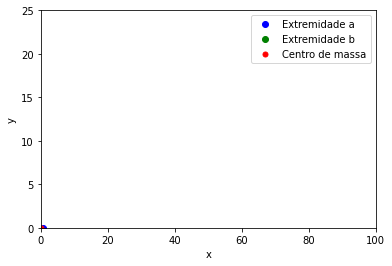

In [4]:
x_a_list = []
y_a_list = []
x_b_list = []
y_b_list = []
x_cm_list = []
y_cm_list = []

fig, ax = plt.subplots()

plt_a_dot, = ax.plot([], [],'bo', markersize = 6)
plt_b_dot, = ax.plot([], [],'go', markersize = 6)
plt_cm_dot, = ax.plot([], [],'ro', markersize = 5)
plt_a, = ax.plot([], [],'b--')
plt_b, = ax.plot([], [],'g--')
plt_cm, = ax.plot([], [],'r-')
plt_line, = ax.plot([], [],'r-')

ax.set_ylim(0, 25)
ax.set_xlim(0, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_label("Trajetória do lançamento de um bastão")
ax.legend(("Extremidade a", "Extremidade b", "Centro de massa"))

def baton_plots(t):
    x_a, y_a = coord_a(t)
    x_a_list.append(x_a)
    y_a_list.append(y_a)

    x_b, y_b = coord_b(t)
    x_b_list.append(x_b)
    y_b_list.append(y_b)

    x_cm, y_cm = coord_cm(t)
    x_cm_list.append(x_cm)
    y_cm_list.append(y_cm)

    linex = [x_a, x_b]
    liney = [y_a, y_b]

    plt_a.set_data(x_a_list, y_a_list)
    plt_a_dot.set_data(x_a, y_a)
    plt_b.set_data(x_b_list, y_b_list)
    plt_b_dot.set_data(x_b, y_b)
    plt_cm.set_data(x_cm_list, y_cm_list)
    plt_cm_dot.set_data(x_cm, y_cm)
    plt_line.set_data(linex, liney)

    return plt_a, plt_a_dot, plt_b, plt_b_dot, plt_cm, plt_cm_dot, plt_line,

t_list = linspace(0, 5, 200)

ani = animation.FuncAnimation(fig, baton_plots, t_list, interval=10, blit=True, repeat=False)
#ani.save('baton.gif')

![Gráfico do movimento do bastão](../Imagens/baton.gif)